In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter

In [ ]:
# 통계 계산 함수
def calculate_statistics(data):
    # 평균
    mean = np.mean(data)
    # 중앙값
    median = np.median(data)
    # 최빈값
    rounded_data = np.round(data, decimals=2)  # 소수점 2자리까지 반올림
    data_counts = Counter(rounded_data)
    mode_value = max(data_counts, key=data_counts.get)  # 최빈값 추출

    return mean, median, mode_value

In [ ]:
# 시각화 함수
def visualization(index, data, axes, stats, xlabel, title, bins=30, alpha=0.5, linestyle='dashed', linewidth=2, color='skyblue'):
    mean, median, mode_value = stats

    # 히스토그램 생성
    counts, bin_edges, _ = axes[index].hist(data, bins=bins, alpha=alpha, color=color, label=f'Histogram of {title}', density=True)

    # 정규분포 곡선 추가
    x = np.linspace(min(data), max(data), 1000)
    pdf = norm.pdf(x, loc=mean, scale=np.std(data))
    axes[index].plot(x, pdf, color='blue', linestyle='solid', linewidth=2, label='Normal Distribution')

    # 평균, 중앙값, 최빈값 표시
    axes[index].axvline(mean, color='red', linestyle=linestyle, linewidth=linewidth, label=f'Mean: {mean:.2f}')
    axes[index].axvline(median, color='green', linestyle=linestyle, linewidth=linewidth, label=f'Median: {median:.2f}')
    axes[index].axvline(mode_value, color='purple', linestyle=linestyle, linewidth=linewidth, label=f'Mode: {mode_value:.2f}')

    # 제목 및 범례
    axes[index].set_title(title)
    axes[index].set_xlabel(xlabel)
    axes[index].set_ylabel('Density')
    axes[index].legend()

In [ ]:
# 데이터 생성
np.random.seed(42)
left_data = np.random.beta(a=2, b=5, size=1000) * 100  # 왼쪽으로 치우친 데이터
right_data = np.random.beta(a=5, b=2, size=1000) * 100  # 오른쪽으로 치우친 데이터

data = [left_data, right_data]
titles = ['Left_Skewed', 'Right_Skewed']

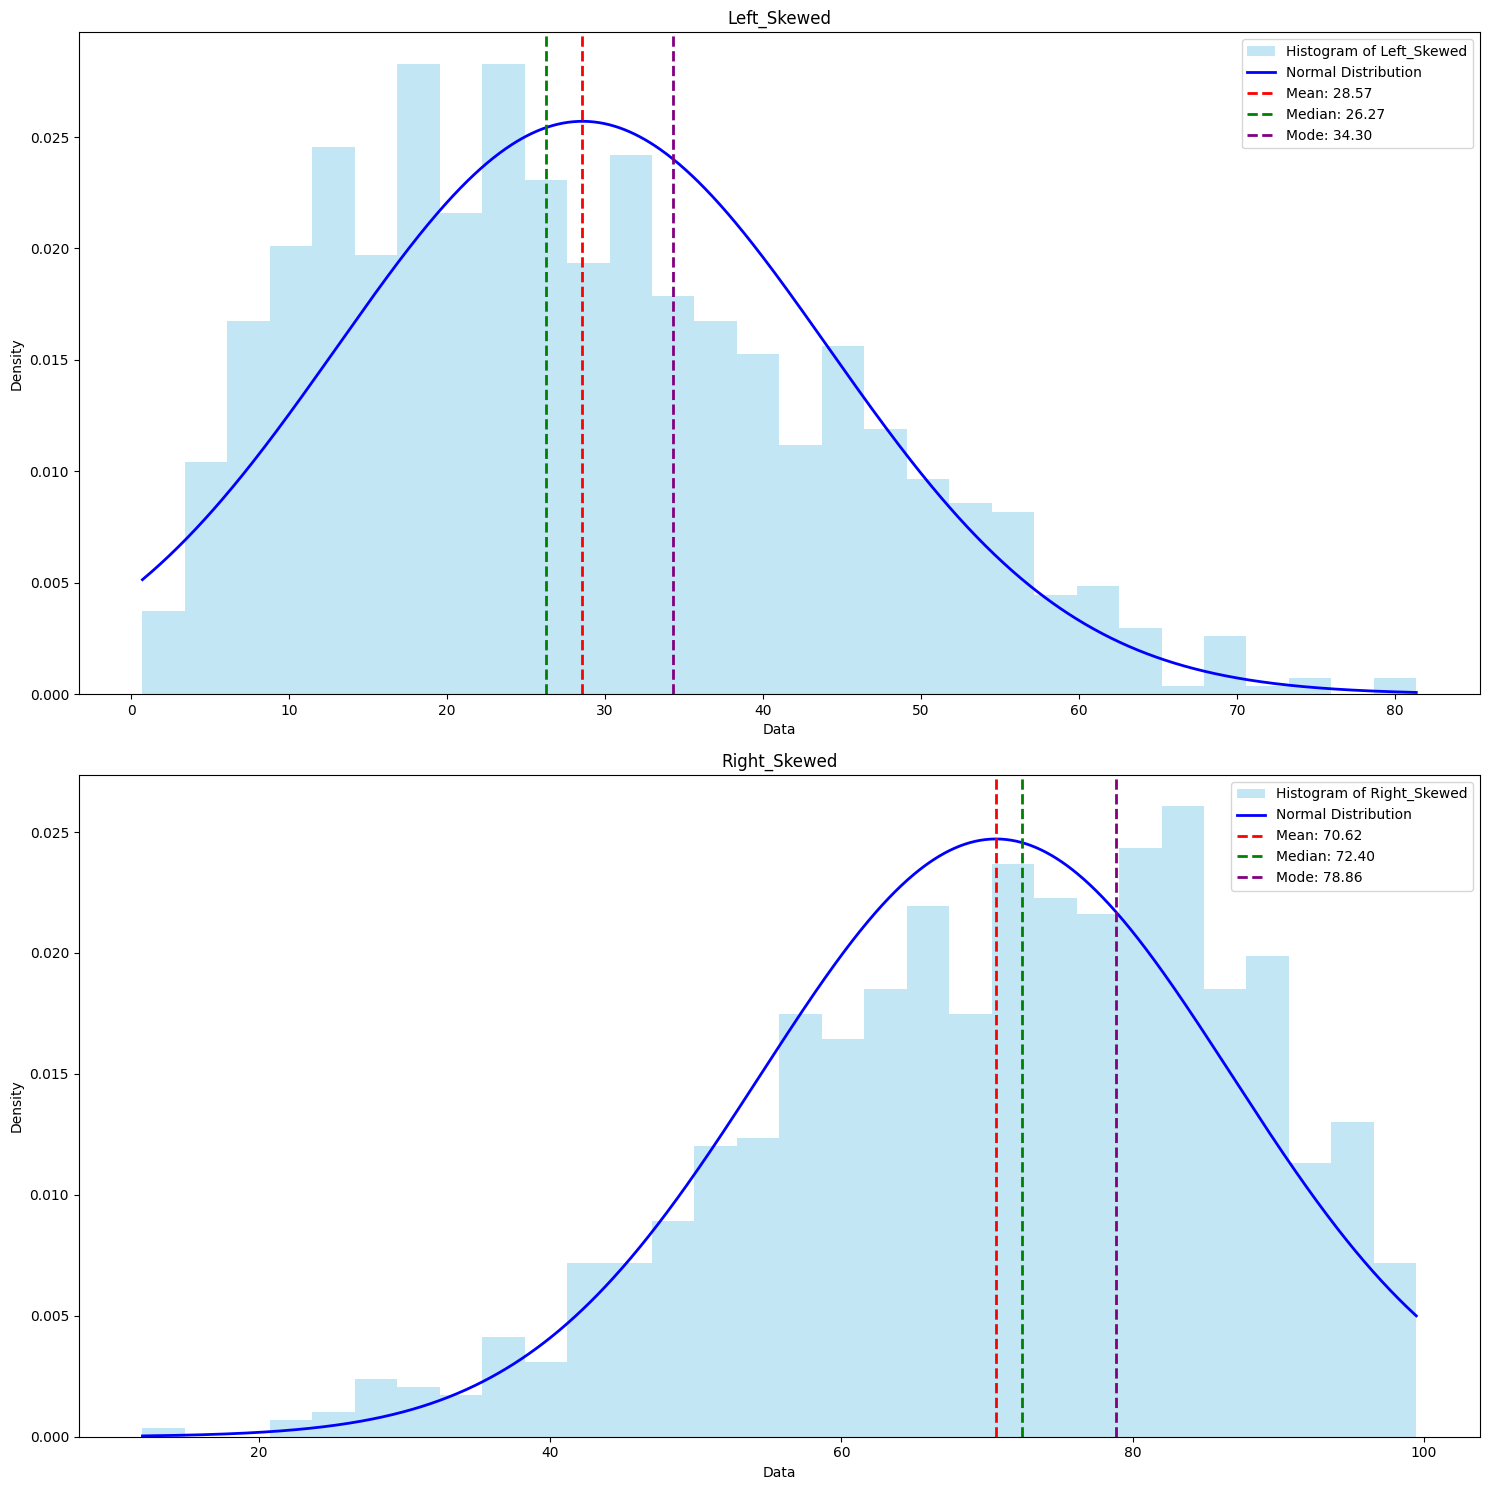

In [ ]:
# 플롯 생성
fig, axes = plt.subplots(2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(data)):
    stats = calculate_statistics(data[i])
    visualization(
        index=i,
        data=data[i],
        axes=axes,
        stats=stats,
        xlabel='Data',
        title=titles[i],
        bins=30,
        alpha=0.5,
        linestyle='dashed',
        linewidth=2,
        color='skyblue'
    )

plt.tight_layout()
plt.show()